# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'ECON_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Load your datasets from your project folder in Google Drive
birth = pd.read_csv('Birth rate.csv')
zillow = pd.read_csv('zillow.csv')

# Display first few rows to confirm loading
print("Birth Rate Data:")
display(birth.head())

print("Zillow Data:")
display(zillow.head())

Birth Rate Data:


,YEAR,STATE,FERTILITY RATE,BIRTHS,URL
0,2023,AL,57.9,57858,/nchs/pressroom/states/alabama/al.htm
1,2023,AK,62.4,9015,/nchs/pressroom/states/alaska/ak.htm
2,2023,AZ,54.2,78096,/nchs/pressroom/states/arizona/az.htm
3,2023,AR,59.2,35264,/nchs/pressroom/states/arkansas/ar.htm
4,2023,CA,50.4,400108,/nchs/pressroom/states/california/ca.htm


Zillow Data:


,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,...,1/31/25,2/28/25,3/31/25,4/30/25,5/31/25,6/30/25,7/31/25,8/31/25,9/30/25,10/31/25
0,102001,0,United States,country,NaN,186744.8356,187549.3628,188366.7662,189260.5311,190246.4988,...,362348.9666,362807.9194,362533.0735,362005.9586,361321.6783,360705.6154,360279.8042,360052.6082,360293.7121,360727.1218
1,394913,1,"New York, NY",msa,NY,414074.4428,414275.5014,414751.0516,415366.8012,416598.3164,...,689682.5778,690983.1936,692691.2175,695141.2610,696921.2030,698406.1231,699586.0526,700381.0327,701790.4518,704140.7231
2,753899,2,"Los Angeles, CA",msa,CA,505798.8442,507561.4919,507937.2662,508084.0748,508714.9763,...,963545.8123,961517.6971,956424.5043,952110.2522,947340.2045,942988.9291,940398.4654,939327.8284,940383.9093,942798.5952
3,394463,3,"Chicago, IL",msa,IL,195905.9910,196220.6878,196763.8964,197296.2163,198179.4209,...,328627.3816,329973.1950,330818.5865,331419.1590,331709.5732,332070.2882,332909.0550,333904.1606,335236.3191,336540.2506
4,394514,4,"Dallas, TX",msa,TX,175129.6146,176655.9411,178165.5098,179553.8508,181006.9657,...,374885.8716,374099.6677,372599.4433,370475.6778,368063.3247,365702.9984,363689.4983,362329.5339,361683.4723,361335.4223


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here
# ---- Step 1: Data Preparation ----

# 1. Extract state abbreviations from Zillow MSA names
def get_state(region):
    if isinstance(region, str) and "," in region:
        return region.split(",")[-1].strip()
    return None

zillow['StateAbbr'] = zillow['RegionName'].apply(get_state)

# Keep only rows that correspond to MSAs with valid state abbreviations
msa = zillow[zillow['StateAbbr'].notnull()]

# 2. Select a housing price column to use (December 2023)
date_col = '12/31/23'

# Compute average home value per state (mean of MSAs within each state)
state_values = (
    msa.groupby('StateAbbr')[date_col]
       .mean()
       .reset_index()
       .rename(columns={date_col: 'HomeValue'})
)

# 3. Merge birth rate data with housing value data
merged = pd.merge(
    birth,
    state_values,
    left_on='STATE',
    right_on='StateAbbr',
    how='inner'
)

# Show merged dataset
print("Merged Dataset Preview:")
display(merged.head())

print("Number of rows:", len(merged))


Merged Dataset Preview:


,YEAR,STATE,FERTILITY RATE,BIRTHS,URL,StateAbbr,HomeValue
0,2023,AL,57.9,57858,/nchs/pressroom/states/alabama/al.htm,AL,206216.132830
1,2023,AK,62.4,9015,/nchs/pressroom/states/alaska/ak.htm,AK,364367.104250
2,2023,AZ,54.2,78096,/nchs/pressroom/states/arizona/az.htm,AZ,356977.802290
3,2023,AR,59.2,35264,/nchs/pressroom/states/arkansas/ar.htm,AR,166702.708472
4,2023,CA,50.4,400108,/nchs/pressroom/states/california/ca.htm,CA,601069.535641


Number of rows: 450


In [ ]:
# Save your dataset after you've worked on it
# Save your cleaned dataset for later use
merged.to_csv('cleaned_data.csv', index=False)

print("Cleaned dataset saved as cleaned_data.csv")

Cleaned dataset saved as cleaned_data.csv


## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

Summary Statistics:


,FERTILITY RATE,HomeValue
count,450.000000,450.000000
mean,59.077778,321952.275483
std,6.235443,147325.837112
min,42.100000,144889.926342
25%,54.900000,206216.132830
50%,59.200000,273606.597249
75%,62.675000,422204.279211
max,78.200000,856330.541150



Correlation Matrix:


,FERTILITY RATE,HomeValue
FERTILITY RATE,1.000000,-0.240584
HomeValue,-0.240584,1.000000


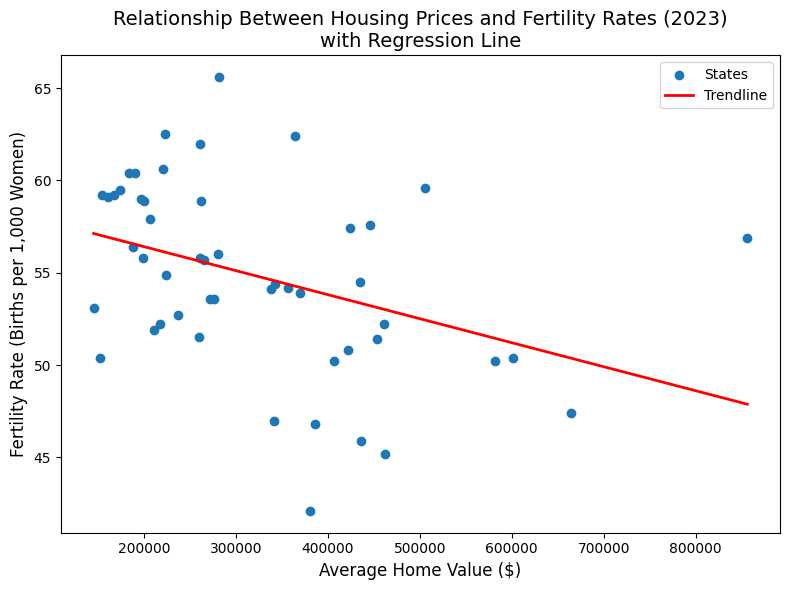

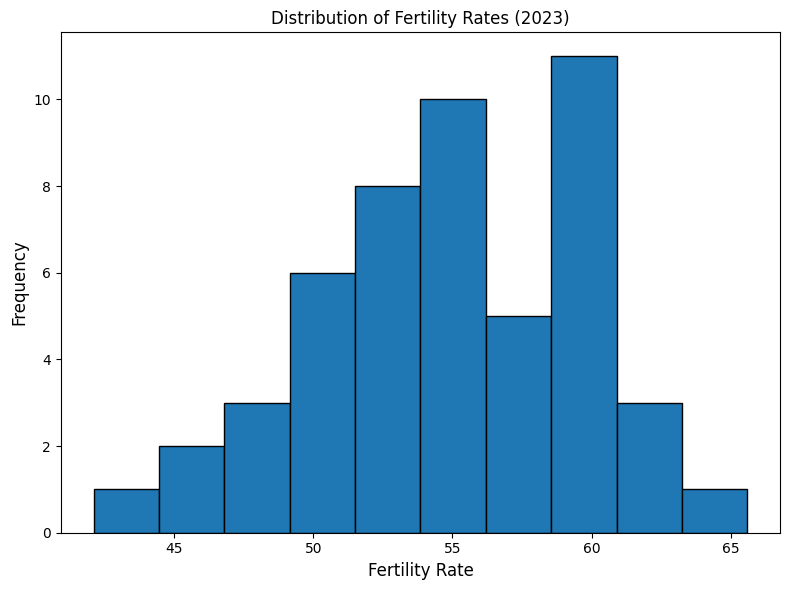

In [ ]:
# Exploratory Data Analysis here
# ---- Step 2: Exploratory Data Analysis ----

# Summary statistics for fertility rates and home values
print("Summary Statistics:")
display(merged[['FERTILITY RATE', 'HomeValue']].describe())

# Correlation between the main variables
corr = merged[['FERTILITY RATE', 'HomeValue']].corr()
print("\nCorrelation Matrix:")
display(corr)

# Filter most recent year (2023) for clearer visualization
df2023 = merged[merged['YEAR'] == 2023]

# Scatterplot with regression line showing main relationship
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(df2023['HomeValue'], df2023['FERTILITY RATE'], label='States')

# Regression line
x = df2023['HomeValue']
y = df2023['FERTILITY RATE']
coef = np.polyfit(x, y, 1)
poly_fn = np.poly1d(coef)
plt.plot(np.sort(x), poly_fn(np.sort(x)), color='red', linewidth=2, label='Trendline')

# Labels and formatting
plt.xlabel("Average Home Value ($)", fontsize=12)
plt.ylabel("Fertility Rate (Births per 1,000 Women)", fontsize=12)
plt.title("Relationship Between Housing Prices and Fertility Rates (2023)\nwith Regression Line", fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()


# OPTIONAL: Histogram of fertility rates
plt.figure(figsize=(8,6))
plt.hist(df2023['FERTILITY RATE'], bins=10, edgecolor='black')
plt.xlabel("Fertility Rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Fertility Rates (2023)")
plt.tight_layout()
plt.show()


## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Build and run your model here
# ---- Step 3: Statistical Modeling ----

# (1) Null Hypothesis:
# H0: There is no relationship between housing prices and fertility rates (β1 = 0)

# (2) Statistical Model:
# FertilityRate = β0 + β1 * HomeValue + ε

# (3) Run OLS regression for 2023 data
model = smf.ols("Q('FERTILITY RATE') ~ HomeValue", data=df2023).fit()

print("OLS Regression Results:")
print(model.summary())



OLS Regression Results:
                             OLS Regression Results                            
Dep. Variable:     Q('FERTILITY RATE')   R-squared:                       0.148
Model:                             OLS   Adj. R-squared:                  0.130
Method:                  Least Squares   F-statistic:                     8.330
Date:                 Fri, 05 Dec 2025   Prob (F-statistic):            0.00583
Time:                         18:51:01   Log-Likelihood:                -147.15
No. Observations:                   50   AIC:                             298.3
Df Residuals:                       48   BIC:                             302.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.0

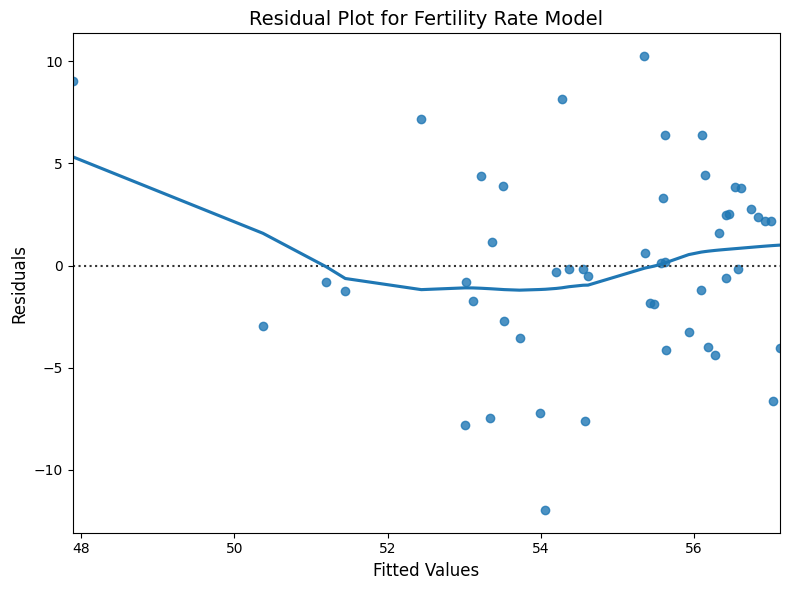

In [ ]:
# Residual plot to assess validity of assumptions

plt.figure(figsize=(8,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot for Fertility Rate Model", fontsize=14)
plt.tight_layout()
plt.show()
